<a href="https://colab.research.google.com/github/Joker00229/D-DOCUMENT-Cours-GITHUB/blob/master/SPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Je veux realisé une etude sur les risques d'inondation
Étape	Outil	Objectif
1. Calcul SPI	Python (xee + standard_precip)	Identifier anomalies
2. Analyse des pluies	DataFrame Pandas	Connaître volume d’eau
3. Simulation	Global Mapper	Visualiser montée des eaux
4. Croisement	QGIS ou Global Mapper	Identifier les zones vulnérables
je pense aussi a jouter une rubrique de modelisation du spi pour predire les inondations

In [ ]:
import ee
import xarray as xr

In [ ]:
!pip install xee
import xee


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00


In [ ]:
ee.Authenticate()
ee.Initialize(project = 'ee-zoulyadeinit', opt_url = 'https://earthengine-highvolume.googleapis.com')

In [ ]:
time_start = ee.Date('2000')
time_end = ee.Date('2024')
time_dif = time_end.difference(time_start, 'month').round()
time_list = ee.List.sequence(0, ee.Number(time_dif).subtract(1),1).map(lambda x: time_start.advance(x, 'month'))

In [ ]:
col = ee.ImageCollection("NOAA/PERSIANN-CDR").filterDate(time_start, time_end)

In [ ]:
def monthly(date):
  start_date = ee.Date(date)
  end_date = start_date.advance(1, 'month')
  img = col.filterDate(start_date, end_date).sum()
  return img.set('system:time_start', start_date.millis())

In [ ]:
monthly_col = ee.ImageCollection(time_list.map(monthly))

In [ ]:
loc = [0.35, 5.0, 4.0, 13.5]

In [ ]:
ds = xr.open_dataset(monthly_col, engine = 'ee', crs = 'EPSG:4326', scale = 0.27, geometry = loc)

In [ ]:
ds

<xarray.Dataset> Size: 503kB
Dimensions:        (time: 288, lon: 14, lat: 31)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2000-01-01 ... 2023-12-01
  * lon            (lon) float64 112B 0.485 0.755 1.025 ... 3.455 3.725 3.995
  * lat            (lat) float64 248B 5.135 5.405 5.675 ... 12.7 12.96 13.24
Data variables:
    precipitation  (time, lon, lat) float32 500kB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
annual = ds.resample(time = 'YE').sum('time')

In [ ]:
annual

<xarray.Dataset> Size: 42kB
Dimensions:        (time: 24, lon: 14, lat: 31)
Coordinates:
  * lon            (lon) float64 112B 0.485 0.755 1.025 ... 3.455 3.725 3.995
  * lat            (lat) float64 248B 5.135 5.405 5.675 ... 12.7 12.96 13.24
  * time           (time) datetime64[ns] 192B 2000-12-31 ... 2023-12-31
Data variables:
    precipitation  (time, lon, lat) float32 42kB 731.9 676.6 ... 613.2 554.6
Attributes:
    crs:      EPSG:4326

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(annual)

<xarray.Dataset> Size: 42kB
Dimensions:        (time: 24, lon: 14, lat: 31)
Coordinates:
  * lon            (lon) float64 112B 0.485 0.755 1.025 ... 3.455 3.725 3.995
  * lat            (lat) float64 248B 5.135 5.405 5.675 ... 12.7 12.96 13.24
  * time           (time) datetime64[ns] 192B 2000-12-31 ... 2023-12-31
Data variables:
    precipitation  (time, lon, lat) float32 42kB 731.9 676.6 ... 613.2 554.6
Attributes:
    crs:      EPSG:4326


Obtenir la figure et les axes générés par xarray




<ipython-input-91-28b65dba1835>:5: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flat:


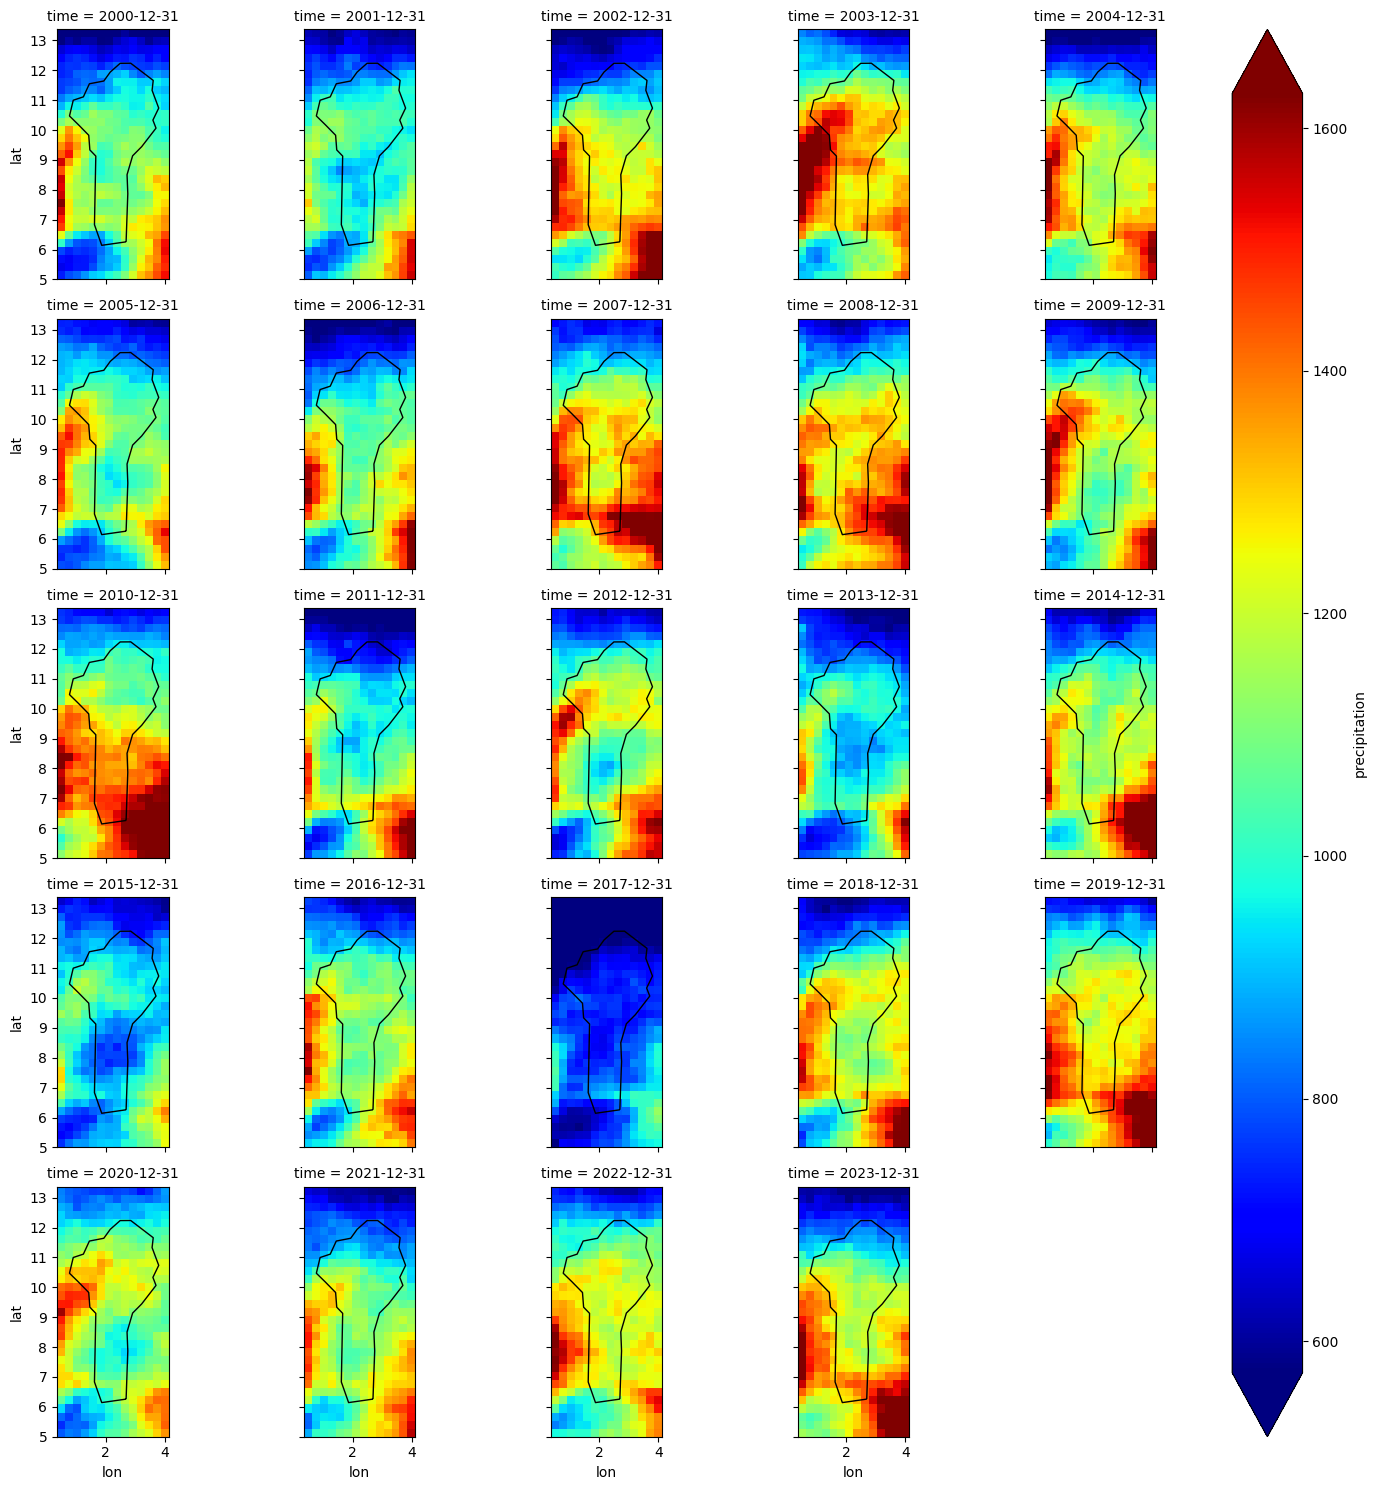

In [ ]:
g = annual.precipitation.plot(
    x='lon', y='lat', cmap='jet', col='time',
    robust=True, col_wrap=5
)
for ax in g.axes.flat:
    benin.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

Ajouter les limites du Bénin à chaque subplot

<ipython-input-70-91307f683b5f>:1: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flat:


In [ ]:
point = ds.sel(lon = 2.5375864406003945, lat = 6.535836718703871, method = 'nearest')

In [ ]:
point

<xarray.Dataset> Size: 3kB
Dimensions:        (time: 288)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2000-01-01 ... 2023-12-01
    lon            float64 8B 2.645
    lat            float64 8B 6.485
Data variables:
    precipitation  (time) float32 1kB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
point.time.values

point.precipitation.values

array([  5.0461946 ,   6.7531204 ,  36.89268   ,  90.252754  ,
       150.54735   , 265.73972   , 120.408134  , 113.81594   ,
       272.93625   ,  95.903275  ,  22.573175  ,   5.9844837 ,
         8.4869    ,   5.519185  ,  51.99073   , 125.53807   ,
       219.44955   , 241.67522   , 125.23888   ,  21.143387  ,
       128.69508   ,  90.34196   ,  34.72009   ,  40.734665  ,
         5.3020434 ,  25.324434  ,  73.92963   , 158.56284   ,
        96.9894    , 325.94614   , 260.04044   ,  39.0217    ,
        74.351074  , 184.42827   ,  40.57503   ,   3.4984648 ,
        42.66982   ,  30.292059  ,  37.466267  , 167.59409   ,
       111.51445   , 306.54025   ,  58.789097  ,  34.130344  ,
       170.55327   , 180.13638   ,  54.394115  ,  10.406554  ,
        71.89545   ,  27.708271  ,  47.13412   ,  75.20935   ,
       246.241     , 167.72943   , 108.010574  ,  37.239532  ,
       326.16455   , 186.44914   ,  50.528038  ,   2.4380603 ,
         1.3352913 ,  29.358274  , 126.965385  ,  98.19

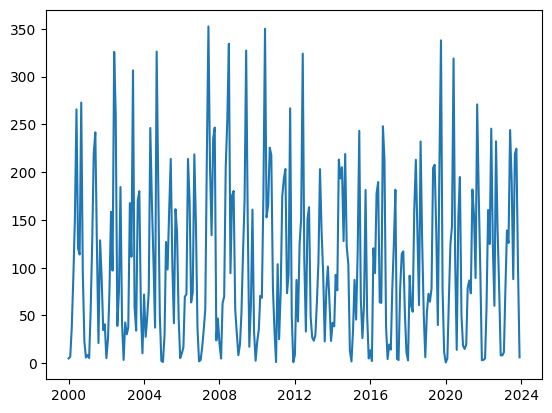

In [ ]:
plt.plot(point.time, point.precipitation)

In [ ]:
!pip install standard_precip

In [ ]:
from standard_precip import spi

In [ ]:
import pandas as pd

In [ ]:
date = point.time.values
pr = point.precipitation.values

In [ ]:
df = pd.DataFrame({'date': date, 'pr': pr})

In [ ]:
df

,date,pr
0,2000-01-01,5.046195
1,2000-02-01,6.753120
2,2000-03-01,36.892681
3,2000-04-01,90.252754
4,2000-05-01,150.547348
...,...,...
283,2023-08-01,88.049149
284,2023-09-01,219.049515
285,2023-10-01,224.516403
286,2023-11-01,100.057182


In [ ]:
spi_fun = spi.SPI()


In [ ]:
spi_12months = spi_fun.calculate(df, 'date', 'pr', freq = 'M', scale = 12, fit_type ='lmom', dist_type = 'gam')


In [ ]:
spi_12months.to_csv('spi_12month.csv')


In [ ]:
spi_12months

,date,pr_scale_12,pr_scale_12_calculated_index
0,2000-01-01,NaN,NaN
1,2000-02-01,NaN,NaN
2,2000-03-01,NaN,NaN
3,2000-04-01,NaN,NaN
4,2000-05-01,NaN,NaN
...,...,...,...
283,2023-08-01,1341.950765,0.682394
284,2023-09-01,1328.680562,0.579771
285,2023-10-01,1413.106526,0.893512
286,2023-11-01,1435.220471,0.935344


In [ ]:
from standard_precip.utils import plot_index

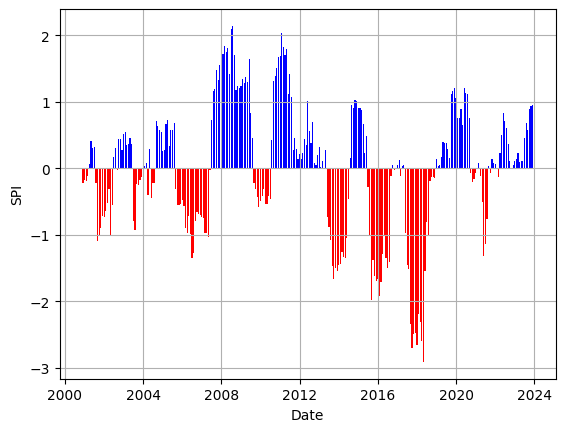

In [ ]:
fig = plot_index(spi_12months, 'date', 'pr_scale_12_calculated_index')

Étape 1 : Identifier les périodes critiques avec le SPI
Un SPI ≥ +1.5 sur 1, 3 ou 12 mois = période avec excès de pluie anormal → potentiel d’inondation.

Tu peux tracer le graphe SPI (ce que tu as déjà fait) et repérer les pics.

In [ ]:
spi_12months[spi_12months['pr_scale_12_calculated_index'] >= 1.5]

,date,pr_scale_12,pr_scale_12_calculated_index
95,2007-12-01,1572.586675,1.557458
96,2008-01-01,1589.898024,1.741918
97,2008-02-01,1577.539876,1.729047
98,2008-03-01,1605.844972,1.842874
99,2008-04-01,1619.180070,1.748202
100,2008-05-01,1610.048234,1.815477
102,2008-07-01,1640.355669,2.104060
103,2008-08-01,1600.587823,2.144032
104,2008-09-01,1540.845010,1.711526
113,2009-06-01,1565.135197,1.653643


from matplotlib import pyplot as plt
_df_0['pr_scale_12'].plot(kind='hist', bins=20, title='pr_scale_12')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pr_scale_12_calculated_index'].plot(kind='hist', bins=20, title='pr_scale_12_calculated_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='pr_scale_12', y='pr_scale_12_calculated_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['pr_scale_12']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('pr_scale_12')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['pr_scale_12_calculated_index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('pr_scale_12_calculated_index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['pr_scale_12']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('pr_scale_12')

from matplotlib import pyplot as plt
_df_7['pr_scale_12'].plot(kind='line', figsize=(8, 4), title='pr_scale_12')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['pr_scale_12_calculated_index'].plot(kind='line', figsize=(8, 4), title='pr_scale_12_calculated_index')
plt.gca().spines[['top', 'right']].set_visible(False)

Étape 2 : Regarder la précipitation réelle pendant ces pics
Dans tes données SPI, tu as aussi la colonne 'pr' (pluie en mm).

Compare ces valeurs à la capacité d’absorption du sol et à la pluviométrie normale.

In [ ]:
df[df['date'].isin(spi_12months[spi_12months['pr_scale_12_calculated_index'] >= 1.5]['date'])]

,date,pr,pr_scale_12
95,2007-12-01,46.879639,1572.586675
96,2008-01-01,20.761675,1589.898024
97,2008-02-01,4.902009,1577.539876
98,2008-03-01,62.734409,1605.844972
99,2008-04-01,69.844238,1619.180070
100,2008-05-01,204.957748,1610.048234
102,2008-07-01,334.392883,1640.355669
103,2008-08-01,94.221565,1600.587823
104,2008-09-01,175.599243,1540.845010
113,2009-06-01,327.360474,1565.135197


Sur la base des pics de pluviometrie, on avons determiner le niveau de monter d'eau au niveau du fleuve.
💧1. Capacité d'infiltration estimée
Même sans données précises, on peut faire une estimation par type de sol :


Type de sol	Capacité d'infiltration (mm/h)	Absorption sur fortes pluies
Sol sablonneux (perméable)	15-30 mm/h	Haute absorption
Sol argileux (imperméable)	1-5 mm/h	Faible absorption
Sol saturé / zone humide / proche d’un fleuve	<1 mm/h	Très faible absorption.
 À Bembè, si c’est une zone basse, hydromorphe ou marécageuse, nous avons estimer que moins de 30% de l’eau sera absorbée (voire 10-20% seulement en cas de fortes pluies). dans notre cas d'etude nous avons considéré une absorption de 20 soit 80 % d'eau ecoulé

🧪 Exemple concret :
en Février 2011 nous avons obtenu : 1647 mm de précipitations

en estimant l’absorption à 20% → 80% ruisselle

Nous allons Calculer le volume ruisselé par m² :

1647𝑚𝑚 × 0.80 = 1317.6 𝑚𝑚 = 1.31 𝑚 𝑑’𝑒𝑎𝑢

Donc, si la zone est saturée, tu peux simuler une montée d’eau de ~1.31 m, à ajuster selon la pente et relief.

🗺️ Dans Global Mapper :
Nous avons utiliser la fonction “Simulate Water Level Rise” et Simule une montée d’eau maximal de 1.31m pour observer les zones inondés



Nous allons génré les precipitation du futur

In [24]:
from google.colab import files

uploaded = files.upload()

Saving pr_Amon_MPI-ESM1-2-LR_ssp245_r1i1p1f1_gn_20250116-20351216.nc to pr_Amon_MPI-ESM1-2-LR_ssp245_r1i1p1f1_gn_20250116-20351216 (1).nc


In [25]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm


In [26]:
ds = xr.open_dataset("pr_Amon_MPI-ESM1-2-LR_ssp245_r1i1p1f1_gn_20250116-20351216.nc")

In [27]:
print(ds)


<xarray.Dataset> Size: 20kB
Dimensions:    (time: 132, bnds: 2, lat: 4, lon: 2)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2025-01-16T12:00:00 ... 2035-12-16T1...
  * lat        (lat) float64 32B 6.528 8.394 10.26 12.12
  * lon        (lon) float64 16B 1.875 3.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB ...
    lat_bnds   (time, lat, bnds) float64 8kB ...
    lon_bnds   (time, lon, bnds) float64 4kB ...
    pr         (time, lat, lon) float32 4kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data

Convertir les précipitations en mm/mois
. au debut on a procede a l'extration de la variable precipitation en mm/mois

In [28]:
precip_mm = ds['pr'] * 86400 * 30

In [29]:
print(precip_mm)

<xarray.DataArray 'pr' (time: 132, lat: 4, lon: 2)> Size: 4kB
array([[[6.60811961e-11, 1.66082382e+00],
        [6.60811961e-11, 6.60811961e-11],
        [6.60811961e-11, 6.60811961e-11],
        [6.60811961e-11, 6.60811961e-11]],

       [[5.89163974e-02, 1.64151192e+00],
        [6.52371351e-11, 6.52371351e-11],
        [6.52371351e-11, 6.52371351e-11],
        [6.52371351e-11, 6.52371351e-11]],

       [[2.73123894e+01, 2.93790283e+01],
        [3.15928059e+01, 3.30481758e+01],
        [1.17025614e+00, 1.13910064e-01],
        [3.80580314e-02, 7.27591068e-02]],

       ...,

       [[2.44196030e+02, 3.27608124e+02],
        [1.08756241e+02, 9.56585388e+01],
        [4.85815506e+01, 5.73020058e+01],
        [3.91330093e-01, 2.39569449e+00]],

       [[2.60477238e+01, 5.01561852e+01],
        [2.51690331e+01, 1.35565796e+01],
        [8.50538445e+00, 1.48458385e+01],
        [3.77186079e-05, 4.27166531e-11]],

       [[1.54646114e-03, 1.93119049e-02],
        [4.76232595e-12, 4.762325

In [30]:
point_precip = precip_mm.sel(lat = 6.535836718703871,lon = 2.5375864406003945 , method='nearest')

In [31]:
values = point_precip.values

In [32]:
time = point_precip['time'].values
df_precip = pd.Series(values, index=pd.to_datetime(time))

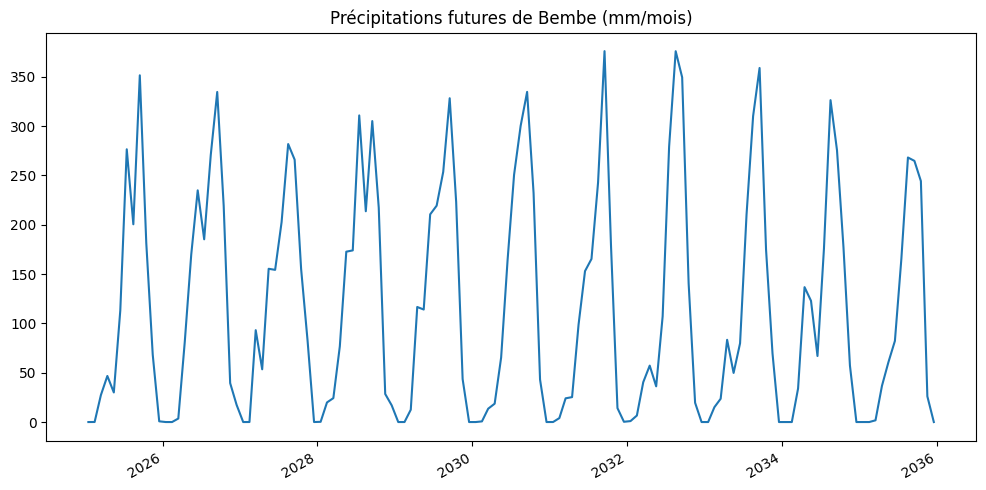

In [33]:
df_precip.plot(title="Précipitations futures de Bembe (mm/mois)", figsize=(12,6))
plt.show()

Reconstituer les pluies mensuelles

In [34]:
point_precip = ds['pr'].sel(lat = 6.535836718703871,lon = 2.5375864406003945, method='nearest')

precip_mm = point_precip * 60 * 60 * 24 * 30

df_precip = precip_mm.to_dataframe().dropna()

In [45]:
def compute_spi(precip, scale=3):
    """Calcule le SPI sur la série temporelle de précipitations"""
    precip = precip.copy()
    precip[precip < 0] = 0
    rolling_precip = precip.rolling(window=scale, min_periods=scale).sum()

    # Ajuste une distribution gamma
    valid = rolling_precip.dropna()
    shape, loc, scale_param = gamma.fit(valid, floc=0)

    # Calcule la CDF
    cdf = gamma.cdf(rolling_precip, shape, loc, scale_param)

    # Transforme en échelle normale (SPI)
    spi = norm.ppf(cdf)

    return spi
    spi_3 = compute_spi(df_precip, scale=3)

In [46]:
import pandas as pd

spi_3_series = pd.Series(spi_3, index=df_precip.index)

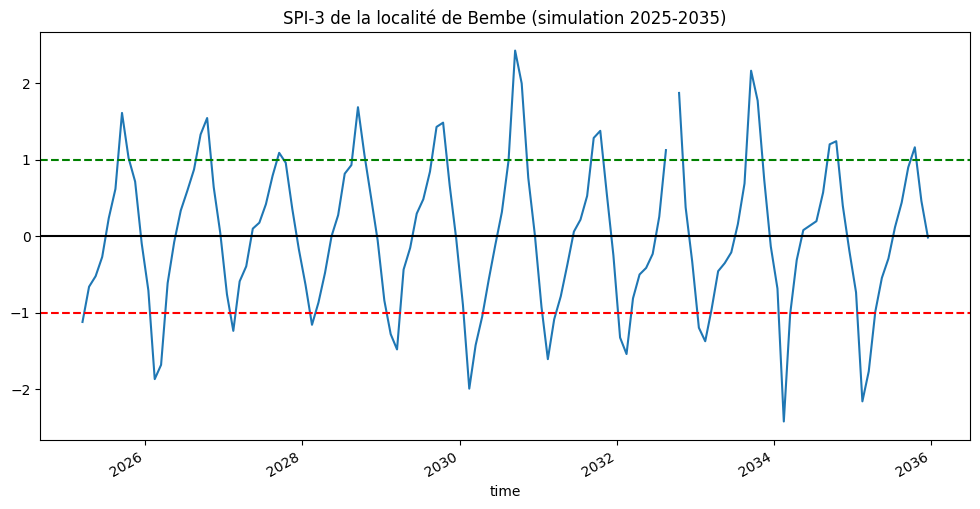

In [48]:
spi_3_series.plot(title="SPI-3 de la localité de Bembe (simulation 2025-2035)", figsize=(12,6))
plt.axhline(0, color='black')
plt.axhline(-1, color='red', linestyle='--')
plt.axhline(1, color='green', linestyle='--')
plt.show()

Calculer le SPI et trouver les mois avec un pic > 1.5

In [49]:
def compute_spi(series, scale):
    rolling_precip = series.rolling(window=scale, min_periods=scale).sum()
    mean = rolling_precip.mean()
    std = rolling_precip.std()
    cdf = rolling_precip.rank(pct=True)  # approximation rapide
    from scipy.stats import norm
    spi = norm.ppf(cdf)
    return spi

spi_3 = compute_spi(df_precip['pr'], scale=3)
spi_3_series = pd.Series(spi_3, index=df_precip.index)

Repérer les mois où SPI > 1.5

In [50]:
high_spi_months = spi_3_series[spi_3_series > 1.5]

high_precip = df_precip.loc[high_spi_months.index, 'pr']


result = pd.DataFrame({
    'SPI-3': high_spi_months,
    'Precipitation (mm)': high_precip
})

print(result)

                        SPI-3  Precipitation (mm)
time                                             
2025-09-16 00:00:00  1.608653          351.387756
2026-10-16 12:00:00  1.541986          219.090134
2028-09-16 00:00:00  1.683348          305.013306
2030-09-16 00:00:00  2.423196          334.586273
2030-10-16 12:00:00  1.993984          232.012665
2032-09-16 00:00:00       inf          349.340546
2032-10-16 12:00:00  1.869607          140.613541
2033-09-16 00:00:00  2.160044          358.815979
2033-10-16 12:00:00  1.768825          174.723557


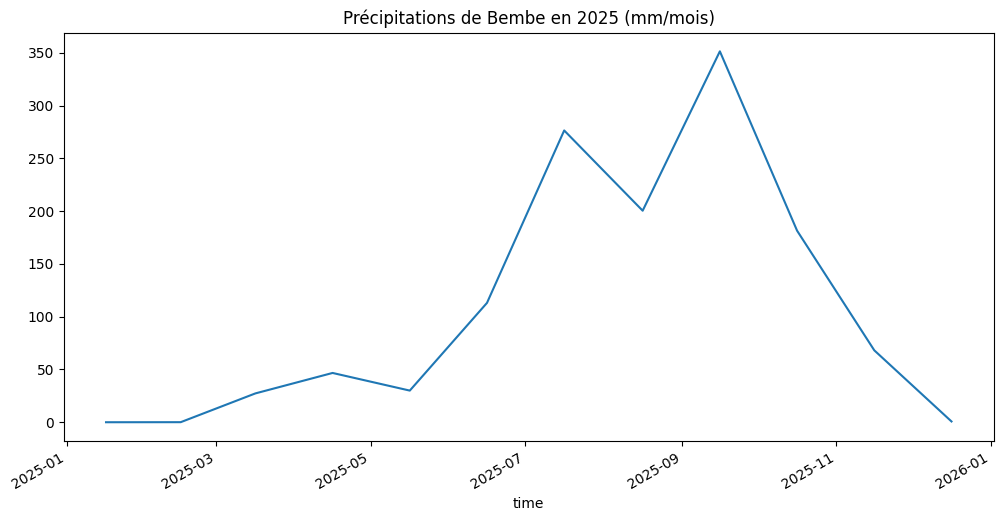

In [54]:
precipitations_2025_df = precip_mm.to_dataframe().dropna()

precipitations_2025_df = precipitations_2025_df[precipitations_2025_df.index.year == 2025]

# Convert to pandas Series before plotting
precipitations_2025_series = precipitations_2025_df['pr']

# Plot the Series
precipitations_2025_series.plot(title="Précipitations de Bembe en 2025 (mm/mois)", figsize=(12, 6))
plt.show()

In [55]:
# Formater le DataFrame pour éviter la notation scientifique
formatted_table = precipitations_2025_df.to_string(float_format='%.2f')

# Afficher le tableau formaté
print(formatted_table)

                     lat  lon     pr
time                                
2025-01-16 12:00:00 6.53 1.88   0.00
2025-02-15 00:00:00 6.53 1.88   0.06
2025-03-16 12:00:00 6.53 1.88  27.31
2025-04-16 00:00:00 6.53 1.88  46.69
2025-05-16 12:00:00 6.53 1.88  29.98
2025-06-16 00:00:00 6.53 1.88 113.07
2025-07-16 12:00:00 6.53 1.88 276.42
2025-08-16 12:00:00 6.53 1.88 200.41
2025-09-16 00:00:00 6.53 1.88 351.39
2025-10-16 12:00:00 6.53 1.88 181.49
2025-11-16 00:00:00 6.53 1.88  68.13
2025-12-16 12:00:00 6.53 1.88   0.74


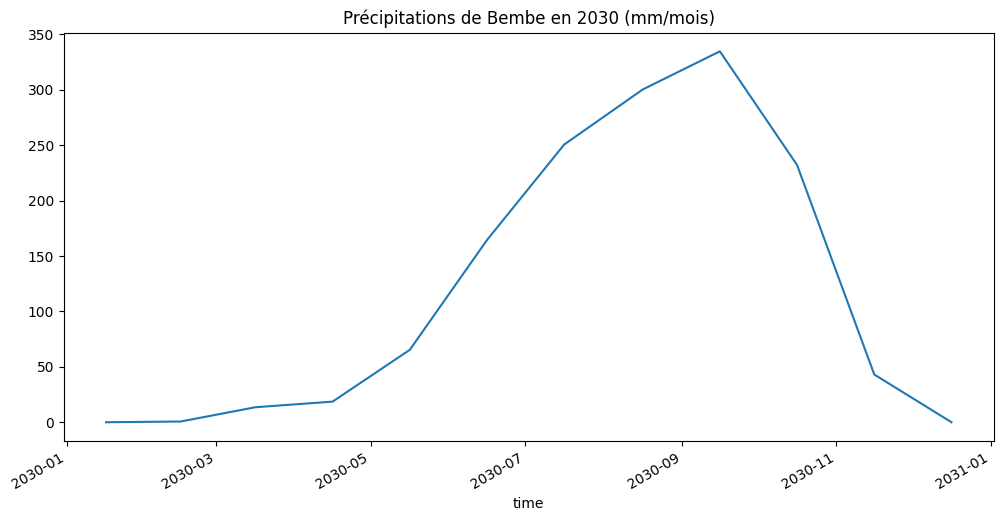

In [57]:
precipitations_2030_df = precip_mm.to_dataframe().dropna()

precipitations_2030_df = precipitations_2030_df[precipitations_2030_df.index.year == 2030]

# Convert to pandas Series before plotting
precipitations_2030_series = precipitations_2030_df['pr']

# Plot the Series
precipitations_2030_series.plot(title="Précipitations de Bembe en 2030 (mm/mois)", figsize=(12, 6))
plt.show()

In [58]:
# Formater le DataFrame pour éviter la notation scientifique
formatted_table = precipitations_2030_df.to_string(float_format='%.2f')

# Afficher le tableau formaté
print(formatted_table)

                     lat  lon     pr
time                                
2030-01-16 12:00:00 6.53 1.88   0.00
2030-02-15 00:00:00 6.53 1.88   0.66
2030-03-16 12:00:00 6.53 1.88  13.54
2030-04-16 00:00:00 6.53 1.88  18.60
2030-05-16 12:00:00 6.53 1.88  65.31
2030-06-16 00:00:00 6.53 1.88 164.36
2030-07-16 12:00:00 6.53 1.88 250.51
2030-08-16 12:00:00 6.53 1.88 300.14
2030-09-16 00:00:00 6.53 1.88 334.59
2030-10-16 12:00:00 6.53 1.88 232.01
2030-11-16 00:00:00 6.53 1.88  43.05
2030-12-16 12:00:00 6.53 1.88   0.00
